## House Prices

A ridge regression model to predict house prices.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Create Sample Data

Let's simulate a real-world dataset where we attempt to predict a house prices based on various features such as square footaage, the number of bedrooms, and the age of the house.

- Create a sample data
- Assign the sample data to a variable as a DataFrame, `houses`
- Display the first five (5) rows

In [4]:
data = {
    'square_footage': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
    'bedrooms': [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'house_age': [10, 15, 20, 15, 10, 8, 5, 3, 2, 1],
    'price': [300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000]
}

houses = pd.DataFrame(data)
houses.head()

,square_footage,bedrooms,house_age,price
0,1500,3,10,300000
1,1600,3,15,320000
2,1700,3,20,340000
3,1800,4,15,360000
4,1900,4,10,380000


Here, we create a simple dataset with three features (`square_footage`, `bedrooms`, and `house_age`) and a target variable (`price`). This dataset will be used to train our Ridge Regression model.

## Define Features and Target Variable

- `X` contains the independent variables or features that will used to predict house prices
- `y` is the dependent variable or target that will represent the house price

In [5]:
X = houses[['square_footage', 'bedrooms', 'house_age']]
y = houses['price']

## Split Data into Training and Testing Sets

We split the data into training and testing sets. Here, 80% of the data is used for training the model, and 20% will be reserved for testing its performance.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Standardize the Features

Standardization is an important step in Ridge Regression because it helps the model treal all features equally, regardless of their scale. This is crucial when regularization is applied.

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build and Train the Ridge Regression Model

- Create a `Ridge` regression model with `alpha=1.0`, which controls the strenght of the regularization or penalty. 
    - A higher alpha increases regularization, which can help prevent overfitting but might also lead to underfitting

In [8]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

## Make Predictions

- Use the trained model to predict house prices on the test set using the standardized test data

In [9]:
y_pred = ridge.predict(X_test_scaled)

## Evaluate the Model

- Mean Squared Error (MSE) measures the average squared difference between the observed and predicted values.
- R-squared (R²) indicates how well the model explains the variance in the target variable.     
    - An R² closer to 1 means the model explains most of the variance in the data.

*NOTE: A lower MSE indicates a better model fit.*

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Preview the Evaluation

In [11]:
print(f'Mean Square Error: {mse}')
print(f'R-squared: {r2}')

Mean Square Error: 245468504.87814867
R-squared: 0.9318143042005143


## Visualize the Results

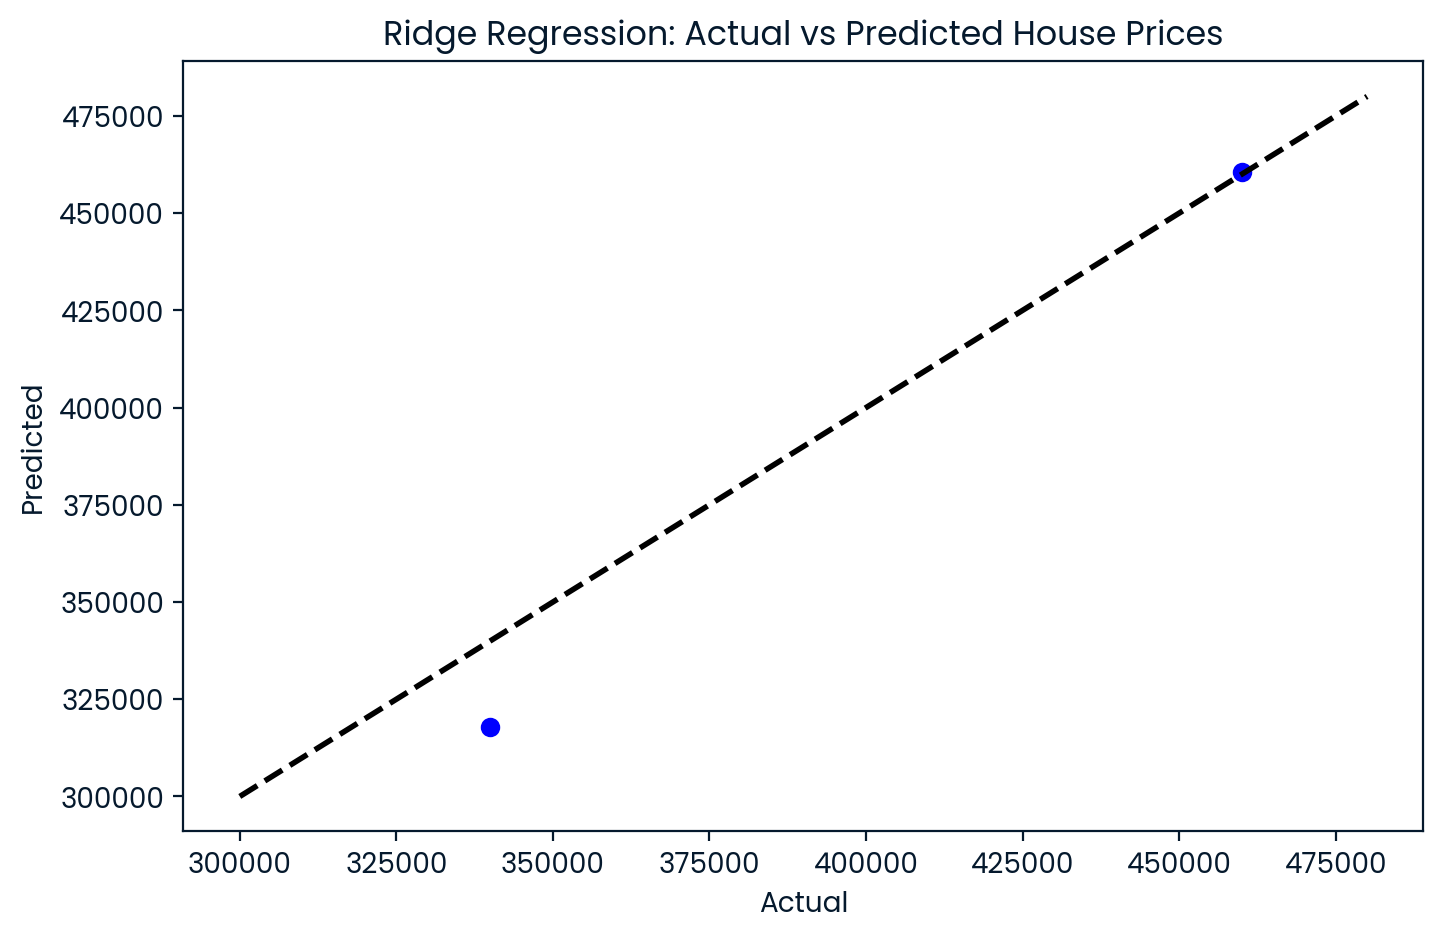

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted House Prices')
plt.show()

This plot visualizes the actual versus predicted house prices. The diagonal line represents a perfect prediction. Points close to this line indicate a better fit by the model.